In [ ]:
!pip -q install --upgrade --no-cache-dir gdown

In [ ]:
!gdown --id 1XY6AM8ruYgHDcJll_P2Cgx6u31V3bDYw

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XY6AM8ruYgHDcJll_P2Cgx6u31V3bDYw
To: /content/ferdousi.txt
100% 4.54M/4.54M [00:00<00:00, 285MB/s]


##Combining Santzas To Make Verses##
**Note: The last verse of the text given doesn't have its second verse. So, I dropped the last line (santza) of the text and my dataframe has 49608 verses.**

In [ ]:
import pandas as pd
df = pd.read_csv('ferdousi.txt', delimiter = "\n", header=None)
df = df[2:]
df = df.reset_index(drop=True)
df1=df.iloc[::2].reset_index(drop=True)
df1 = df1[0:-1]
df2 = df.iloc[1::2].reset_index(drop=True)
del df
df = df1[0]+' '+df2[0]
df

0         به نام خداوند جان و خرد کزین برتر اندیشه برنگذرد
1            خداوند نام و خداوند جای خداوند روزی ده رهنمای
2        خداوند کیوان و گردان سپهر فروزنده ماه و ناهید ...
3        ز نام و نشان و گمان برترست نگارندهٔ بر شده پیکرست
4        به بینندگان آفریننده را نبینی مرنجان دو بیننده را
                               ...                        
49603         همش رای و هم دانش وهم نسب چراغ عجم آفتاب عرب
49604      سرآمد کنون قصهٔ یزدگرد به ماه سفندار مد روز ارد
49605       ز هجرت شده پنج هشتادبار به نام جهانداور کردگار
49606     چواین نامور نامه آمد ببن ز من روی کشور شود پرسخن
49607    از آن پس نمیرم که من زنده ام که تخم سخن من پرا...
Name: 0, Length: 49608, dtype: object

In [ ]:
import torch
import torch.nn as nn

embedding = nn.Embedding(10, 5, padding_idx=0)
input = torch.LongTensor([[0,2,0,5]])
embedding(input)

tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.4257, -0.9839,  0.0026,  1.4298, -0.4305],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.2192,  1.9365,  0.4896,  0.2309,  0.5304]]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
df

0         به نام خداوند جان و خرد کزین برتر اندیشه برنگذرد
1            خداوند نام و خداوند جای خداوند روزی ده رهنمای
2        خداوند کیوان و گردان سپهر فروزنده ماه و ناهید ...
3        ز نام و نشان و گمان برترست نگارندهٔ بر شده پیکرست
4        به بینندگان آفریننده را نبینی مرنجان دو بیننده را
                               ...                        
49603         همش رای و هم دانش وهم نسب چراغ عجم آفتاب عرب
49604      سرآمد کنون قصهٔ یزدگرد به ماه سفندار مد روز ارد
49605       ز هجرت شده پنج هشتادبار به نام جهانداور کردگار
49606     چواین نامور نامه آمد ببن ز من روی کشور شود پرسخن
49607    از آن پس نمیرم که من زنده ام که تخم سخن من پرا...
Name: 0, Length: 49608, dtype: object

In [ ]:
len(df.index)

49608

In [ ]:
verses_words=[]
verses_dict = [' ']
for i in range(len(df.index)):
   a = [s for s in df[i].split(' ')]
   verses_words.append(a)
   verses_dict.extend(a)
verses_dict = list(dict.fromkeys(verses_dict))

verses_words_index = []
max_length = 0
for i in range(len(verses_words)):
  a = [verses_dict.index(s) for s in verses_words[i]]
  max_length = max(len(a),max_length)
  verses_words_index.append(a)

for i in range(len(verses_words_index)):
    verses_words_index[i] = verses_words_index[i] + [0] * (max_length - len(verses_words_index[i]))
verses_dict.extend(['NULL'])

In [ ]:
verses_words

[['به',
  'نام',
  'خداوند',
  'جان',
  'و',
  'خرد',
  'کزین',
  'برتر',
  'اندیشه',
  'برنگذرد'],
 ['خداوند', 'نام', 'و', 'خداوند', 'جای', 'خداوند', 'روزی', 'ده', 'رهنمای'],
 ['خداوند',
  'کیوان',
  'و',
  'گردان',
  'سپهر',
  'فروزنده',
  'ماه',
  'و',
  'ناهید',
  'و',
  'مهر'],
 ['ز',
  'نام',
  'و',
  'نشان',
  'و',
  'گمان',
  'برترست',
  'نگارندهٔ',
  'بر',
  'شده',
  'پیکرست'],
 ['به', 'بینندگان', 'آفریننده', 'را', 'نبینی', 'مرنجان', 'دو', 'بیننده', 'را'],
 ['نیابد',
  'بدو',
  'نیز',
  'اندیشه',
  'راه',
  'که',
  'او',
  'برتر',
  'از',
  'نام',
  'و',
  'از',
  'جایگاه'],
 ['سخن',
  'هر',
  'چه',
  'زین',
  'گوهران',
  'بگذرد',
  'نیابد',
  'بدو',
  'راه',
  'جان',
  'و',
  'خرد'],
 ['خرد',
  'گر',
  'سخن',
  'برگزیند',
  'همی',
  'همان',
  'را',
  'گزیند',
  'که',
  'بیند',
  'همی'],
 ['ستودن',
  'نداند',
  'کس',
  'او',
  'را',
  'چو',
  'هست',
  'میان',
  'بندگی',
  'را',
  'ببایدت',
  'بست'],
 ['خرد',
  'را',
  'و',
  'جان',
  'را',
  'همی',
  'سنجد',
  'اوی',
  'در',
 

In [ ]:
verses_words_index

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 2, 5, 3, 11, 3, 12, 13, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 15, 5, 16, 17, 18, 19, 5, 20, 5, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [22, 2, 5, 23, 5, 24, 25, 26, 27, 28, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 30, 31, 32, 33, 34, 35, 36, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [37, 38, 39, 9, 40, 41, 42, 8, 43, 2, 5, 43, 44, 0, 0, 0, 0, 0, 0, 0],
 [45, 46, 47, 48, 49, 50, 37, 38, 40, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0],
 [6, 51, 45, 52, 53, 54, 32, 55, 41, 56, 53, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [57, 58, 59, 42, 32, 60, 61, 62, 63, 32, 64, 65, 0, 0, 0, 0, 0, 0, 0, 0],
 [6, 32, 5, 4, 32, 53, 66, 67, 68, 69, 70, 71, 72, 67, 0, 0, 0, 0, 0, 0],
 [73, 74, 75, 5, 4, 5, 76, 77, 31, 32, 71, 78, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 79, 80, 41, 81, 82, 22, 83, 84, 85, 86, 82, 0, 0, 0, 0, 0, 0, 0, 0],
 [87, 88, 5, 89, 40, 1, 90, 1, 91, 92, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [94, 95, 46, 41, 96, 95, 22, 97, 98, 99, 100, 95, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
import numpy as np
import torch
verses_words_index_np = np.array([np.array(x) for x in verses_words_index],dtype=int)
verses_words_index_torch = torch.from_numpy(verses_words_index_np)
verses_words_index_torch = verses_words_index_torch.type(torch.LongTensor)

In [ ]:
verses_words_index_torch


tensor([[    1,     2,     3,  ...,     0,     0,     0],
        [    3,     2,     5,  ...,     0,     0,     0],
        [    3,    15,     5,  ...,     0,     0,     0],
        ...,
        [   22, 18010,    28,  ...,     0,     0,     0],
        [14552,   644,   657,  ...,     0,     0,     0],
        [   43,   145,   193,  ...,     0,     0,     0]])

In [ ]:
len(verses_dict)

18013

##Word Embedding##
For word embedding, we need number of unique categorical elements that is equal with kength of "verses_dict" list.<br> We also need to design dimension of embedding Based on the book "Machine Learning Design Patterns: Solutions to Common Challenges in Data Preparation, Model Building, and MLOps.":<br>
"If we’re in a hurry, one rule of thumb is to use the fourth root of the total number of unique categorical elements."

In [ ]:
len(verses_dict)

18013

In [ ]:
from math import sqrt
word_embeded_dim = round(sqrt(sqrt(len(verses_dict))))
torch.manual_seed(42)
# Word embedding of all sentences as an example
embedding = torch.nn.Embedding(len(verses_dict), word_embeded_dim, padding_idx=0)
verse_embeded = embedding(verses_words_index_torch)
verse_embeded

tensor([[[-0.7279, -0.5594, -0.7688,  ...,  1.0783,  0.8008,  1.6806],
         [ 1.2791,  1.2964,  0.6105,  ..., -0.8712, -0.2234,  1.7174],
         [ 0.3189, -0.4245,  0.3057,  ...,  2.1228, -1.2347, -0.4879],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.3189, -0.4245,  0.3057,  ...,  2.1228, -1.2347, -0.4879],
         [ 1.2791,  1.2964,  0.6105,  ..., -0.8712, -0.2234,  1.7174],
         [-0.0978,  1.8446, -1.1845,  ..., -0.1973, -1.0546,  1.2780],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.3189, -0.4245,  0.3057,  ...,  2.1228, -1.2347, -0.4879],
         [-0.9319, -1.5910, -1.1360,  ..., -0

In [ ]:
verses_words_index_torch

tensor([[    1,     2,     3,  ...,     0,     0,     0],
        [    3,     2,     5,  ...,     0,     0,     0],
        [    3,    15,     5,  ...,     0,     0,     0],
        ...,
        [   22, 18010,    28,  ...,     0,     0,     0],
        [14552,   644,   657,  ...,     0,     0,     0],
        [   43,   145,   193,  ...,     0,     0,     0]])

#Making Dataset#

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class MyDataset(Dataset):
    def __init__(self, verses_words_index_torch):
        self.verses = verses_words_index_torch
    def __len__(self):
        return len(self.verses)-1
    def __getitem__(self, idx):
        input_seq = self.verses[idx]
        output_seq = self.verses[idx+1]
        sample = (input_seq, output_seq)
        return sample

In [ ]:
Dataset = MyDataset(verses_words_index_torch)

In [ ]:
from torch.utils.data import random_split
torch.manual_seed(42)
training_data, test_data = random_split(Dataset, [round(len(Dataset)*0.8), len(Dataset)-round(len(Dataset)*0.8)])

#Part1: LSTM#

##Creating LSTM Encoder##

In [ ]:
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
torch.manual_seed(42)



class lstm_encoder(nn.Module):

    def __init__(self, input_size, hidden_size, length_dict = len(verses_dict), num_layers = 1):

        super(lstm_encoder, self).__init__()

        self.embedding = nn.Embedding(length_dict, input_size, padding_idx=0)
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers,batch_first = True)

    def forward(self, x_input):

        x_input = self.embedding(x_input) 
        lstm_out, hidden = self.lstm(x_input)
        
        return lstm_out, hidden     



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
torch.manual_seed(42)
input_size = word_embeded_dim
hidden_size = word_embeded_dim**2
length_dict = len(verses_dict)
encoder = lstm_encoder(input_size = input_size, hidden_size = hidden_size, length_dict = length_dict).to(device)

In [ ]:
torch.manual_seed(42)
#giving encoder instance example of mini batch =2
encoder_output,decoder_init_hidden=encoder(verses_words_index_torch[0:2].to(device))
#showing last hidden unit (h_n) of encoder is equal to the last rows of output(for first element in minibatch_size =2)
decoder_init_hidden[0][0][0]
encoder_output[0][-1]

tensor([ 0.0019,  0.0072,  0.0361,  0.0128, -0.0318, -0.0044, -0.0400,  0.0438,
        -0.0064,  0.0001, -0.0634, -0.0412, -0.0361,  0.0949, -0.0520, -0.0023,
         0.0576, -0.0618,  0.0493,  0.0331,  0.0030,  0.0361, -0.0512, -0.0233,
        -0.0055, -0.0050,  0.0422,  0.0538,  0.0360, -0.0099,  0.0282,  0.0022,
        -0.0029, -0.0589,  0.0366,  0.0222, -0.0315,  0.0165, -0.0202,  0.0060,
        -0.0578,  0.0003,  0.0045, -0.0087,  0.0601,  0.0322, -0.0106,  0.0186,
         0.0241, -0.0069,  0.0259, -0.0232, -0.0695,  0.0232, -0.0404, -0.0824,
         0.0151, -0.0552,  0.0392,  0.0386,  0.0308, -0.0014, -0.0175,  0.0463,
         0.0441,  0.0237,  0.0201,  0.0142, -0.0299, -0.0339,  0.0538, -0.0616,
        -0.0405, -0.0268,  0.0102,  0.0192, -0.0519, -0.0029, -0.0414, -0.0314,
        -0.0262, -0.0062,  0.0643, -0.0194,  0.0098, -0.0072,  0.0074, -0.0856,
         0.0261,  0.0086, -0.0514,  0.0041,  0.0015, -0.0124,  0.0125,  0.0141,
         0.0129,  0.0006,  0.0333, -0.01

##Creating LSTM Decoder##

In [ ]:
class lstm_decoder(nn.Module):
    
    def __init__(self, input_size, output_size, hidden_size,  num_layers = 1):

        super(lstm_decoder, self).__init__()

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers,batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)           

    def forward(self, x_input, hidden_states):
                         
        x_input = encoder.embedding(x_input)
        lstm_out, hidden = self.lstm(x_input,  hidden_states)
        output = self.linear(lstm_out)     
        output = output.squeeze(dim=1)
        return output, hidden


In [ ]:
#giving decoder instance input example: 'Null' and hidden example: Last hidden units of encoder for mini batch =2
output_size = len(verses_dict)
decoder = lstm_decoder(input_size = input_size, output_size = output_size, hidden_size = hidden_size).to(device)
output,_= decoder(torch.tensor(len(verses_dict)-1)*torch.ones(2,1).type(torch.LongTensor).to(device),decoder_init_hidden)
output

tensor([[-0.0791,  0.0621, -0.0645,  ..., -0.0339,  0.1139, -0.0384],
        [-0.0791,  0.0621, -0.0645,  ..., -0.0339,  0.1139, -0.0383]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

##Train Loop Function##
This function updates the model's weights at each epoch.

In [ ]:
def train_loop(dataloader, encoder, decoder, loss_fn, encoder_optimizer,decoder_optimizer):
    batch_size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss, correct = 0, 0
    for batch, (input_tensor, target_tensor) in enumerate(dataloader):
        encoder.train()
        decoder.train()
        input_tensor = input_tensor.to(device)
        target_tensor = target_tensor.to(device)
        loss = 0
        encoder_output, encoder_hidden = encoder(input_tensor)
        decoder_input = torch.tensor(len(verses_dict)-1)*torch.ones(len(input_tensor),1).type(torch.LongTensor).to(device)
        decoder_hidden = encoder_hidden
        # Teacher forcing: Feed the target as the next input
        for di in range(target_tensor.shape[-1]):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            loss += loss_fn(decoder_output, target_tensor[:,di])
            with torch.no_grad():
              correct += (decoder_output.argmax(1) == target_tensor[:,di]).type(torch.float).sum().item()
            decoder_input = target_tensor[:,di].unsqueeze(1)  # Teacher forcing
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        loss.backward()
        encoder_optimizer.step()
        decoder_optimizer.step()
        with torch.no_grad():
          train_loss += loss.item()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(input_tensor)
            print(f"loss: {loss:>7f}  [{current:>5d}/{batch_size:>5d}]")
    train_loss /= num_batches
    correct /= (batch_size*target_tensor.shape[-1])
    return correct,train_loss

##Beam Search Function##
For improving our predictions, I used beam search. This function makes the model to give different outputs for differnet inputs.

In [ ]:
def beam_search(num_words,decoder_input,decoder_hidden,decoder,k = 10,model = 'lstm'):
        if model == 'lstm':        
            for di in range(num_words):
              
                if di==0:
                    decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                    decoder_output_prob = F.softmax(decoder_output,dim = 1)
                    decoder_output_best_prob_all_ways = torch.topk(decoder_output_prob, k,dim=1).values
                    
                    decoder_input_all_ways = torch.topk(decoder_output_prob, k,dim=1).indices.unsqueeze(1)
                    

                    all_ways_route = torch.clone(decoder_input_all_ways)
                    decoder_hidden_length = len(decoder_hidden[0][0][0])
                    

                    decoder_hidden_all_ways_first = decoder_hidden[0].repeat(1, 1, k)
                    decoder_hidden_all_ways_second= decoder_hidden[1].repeat(1, 1, k)
                   
                    continue
                else:
                    for kn in range(k):

                      decoder_output, decoder_hidden = decoder(decoder_input_all_ways[:,:,kn], (torch.narrow(decoder_hidden_all_ways_first, 2, kn*decoder_hidden_length, decoder_hidden_length).contiguous(), torch.narrow(decoder_hidden_all_ways_second, 2, kn*decoder_hidden_length, decoder_hidden_length).contiguous()))
                      decoder_output_prob = F.softmax(decoder_output,dim = 1)
                     
                      decoder_output_prob = decoder_output_best_prob_all_ways[:,kn].unsqueeze(1)*decoder_output_prob
                      if kn==0:
                        decoder_output_prob_all_ways = decoder_output_prob.clone()
                        decoder_hidden_all_ways_first_new = decoder_hidden[0].clone()
                       
                        decoder_hidden_all_ways_second_new = decoder_hidden[1].clone()  
                                             
                        continue
                      decoder_output_prob_all_ways = torch.cat((decoder_output_prob_all_ways,decoder_output_prob), 1)
                      
                      decoder_hidden_all_ways_first_new = torch.cat((decoder_hidden_all_ways_first_new, decoder_hidden[0]), 2)
                      
                      decoder_hidden_all_ways_second_new = torch.cat((decoder_hidden_all_ways_second_new, decoder_hidden[1]), 2)
                      
                    decoder_hidden_all_ways_first = decoder_hidden_all_ways_first_new.clone()
                  
                    decoder_hidden_all_ways_second = decoder_hidden_all_ways_second_new.clone()
                   
                    all_ways_route_stacked = all_ways_route.reshape(all_ways_route.shape[2],all_ways_route.shape[0],all_ways_route.shape[1])
                 
                    decoder_output_prob_all_ways_stacked = decoder_output_prob_all_ways.reshape(k,decoder_output_prob_all_ways.shape[0], int(decoder_output_prob_all_ways.shape[1]/k))
                    
                    which_way = torch.topk(decoder_output_prob_all_ways_stacked, k,dim=(2))
                    
                    finding_which_way = which_way.values.argmax(0)
                    for kn in range(k):  
                      route = torch.gather(all_ways_route_stacked,0,finding_which_way[:,kn].unsqueeze(1).repeat(1, di).unsqueeze(0)).squeeze(0)
                      decoder_input = torch.gather(which_way.indices,0,finding_which_way.unsqueeze(0)).squeeze(0)[:,kn].unsqueeze(1)
                      route = torch.cat((route, decoder_input), 1)
                      if kn == 0:
                        all_ways_route = route.clone()
                        decoder_input_all_ways = decoder_input.clone()
                    
                        continue
                   
                      all_ways_route = torch.cat((all_ways_route, route), 1)
                     

                      decoder_input_all_ways = torch.cat((decoder_input_all_ways , decoder_input), 1)
                    all_ways_route = all_ways_route.reshape(all_ways_route.shape[0],int(all_ways_route.shape[1]/k),k)
                    
                    decoder_input_all_ways = decoder_input_all_ways.reshape(decoder_input_all_ways.shape[0],int(decoder_input_all_ways.shape[1]/k),k)
                   
                    decoder_output_best_prob_all_ways = torch.topk(decoder_output_prob_all_ways, k,dim=(1)).values
            
                  
        if model == 'gru':        
            for di in range(num_words):
              
                if di==0:
                    decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                    decoder_output_prob = F.softmax(decoder_output,dim = 1)
                    decoder_output_best_prob_all_ways = torch.topk(decoder_output_prob, k,dim=1).values
                    
                    decoder_input_all_ways = torch.topk(decoder_output_prob, k,dim=1).indices.unsqueeze(1)
                    

                    all_ways_route = torch.clone(decoder_input_all_ways)
                    decoder_hidden_length = len(decoder_hidden[0][0])
                    

                    decoder_hidden_all_ways = decoder_hidden.repeat(1, 1, k)
                   
                   
                    continue
                else:
                    for kn in range(k):

                      decoder_output, decoder_hidden = decoder(decoder_input_all_ways[:,:,kn], torch.narrow(decoder_hidden_all_ways, 2, kn*decoder_hidden_length, decoder_hidden_length).contiguous())
                      decoder_output_prob = F.softmax(decoder_output,dim = 1)
                     
                      decoder_output_prob = decoder_output_best_prob_all_ways[:,kn].unsqueeze(1)*decoder_output_prob
                      if kn==0:
                        decoder_output_prob_all_ways = decoder_output_prob.clone()
                        decoder_hidden_all_ways_new = decoder_hidden.clone()
                                             
                        continue
                      decoder_output_prob_all_ways = torch.cat((decoder_output_prob_all_ways,decoder_output_prob), 1)
                      
                      decoder_hidden_all_ways_new = torch.cat((decoder_hidden_all_ways_new, decoder_hidden), 2)
                      
                      
                    decoder_hidden_all_ways = decoder_hidden_all_ways_new.clone()
                  
                   
                    all_ways_route_stacked = all_ways_route.reshape(all_ways_route.shape[2],all_ways_route.shape[0],all_ways_route.shape[1])
                 
                    decoder_output_prob_all_ways_stacked = decoder_output_prob_all_ways.reshape(k,decoder_output_prob_all_ways.shape[0], int(decoder_output_prob_all_ways.shape[1]/k))
                    
                    which_way = torch.topk(decoder_output_prob_all_ways_stacked, k,dim=(2))
                    
                    finding_which_way = which_way.values.argmax(0)
                    for kn in range(k):  
                      route = torch.gather(all_ways_route_stacked,0,finding_which_way[:,kn].unsqueeze(1).repeat(1, di).unsqueeze(0)).squeeze(0)
                      decoder_input = torch.gather(which_way.indices,0,finding_which_way.unsqueeze(0)).squeeze(0)[:,kn].unsqueeze(1)
                      route = torch.cat((route, decoder_input), 1)
                      if kn == 0:
                        all_ways_route = route.clone()
                        decoder_input_all_ways = decoder_input.clone()
                    
                        continue
                   
                      all_ways_route = torch.cat((all_ways_route, route), 1)
                     

                      decoder_input_all_ways = torch.cat((decoder_input_all_ways , decoder_input), 1)
                    all_ways_route = all_ways_route.reshape(all_ways_route.shape[0],int(all_ways_route.shape[1]/k),k)
                    
                    decoder_input_all_ways = decoder_input_all_ways.reshape(decoder_input_all_ways.shape[0],int(decoder_input_all_ways.shape[1]/k),k)
                   
                    decoder_output_best_prob_all_ways = torch.topk(decoder_output_prob_all_ways, k,dim=(1)).values

        return all_ways_route[:,:,0]
                      


##Test Loop##
This function gets the test dataset and outputs the loss and accuracy of the model on this dataset.

In [ ]:
def test_loop(dataloader, encoder, decoder, loss_fn,model = 'lstm'):
    batch_size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0 
    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:
            input_tensor = input_tensor.to(device)
            target_tensor = target_tensor.to(device)
            encoder.eval()
            decoder.eval()
            # Teacher forcing: Feed the best way (last way1) components as the next inputs
            encoder_output, encoder_hidden = encoder(input_tensor)
            decoder_input = torch.tensor(len(verses_dict)-1)*torch.ones(len(input_tensor),1).type(torch.LongTensor).to(device)
            decoder_hidden = encoder_hidden
            best_route = beam_search(target_tensor.shape[-1],decoder_input,decoder_hidden, decoder,7,model)
            for di in range(target_tensor.shape[-1]):
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
                test_loss += loss_fn(decoder_output, target_tensor[:,di]).item()
                correct += (decoder_output.argmax(1) == target_tensor[:,di]).type(torch.float).sum().item()
                decoder_input =  best_route[:,di].unsqueeze(1)
                
    test_loss /= num_batches
    correct /= (batch_size*target_tensor.shape[-1])
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct,test_loss


##Generative Model##
This Model gets a verse and outputs the predicted next verse.

In [ ]:
def Generative_Model(string_verse,encoder,decoder,model = 'lstm'):
    string_verse_split = [s for s in string_verse.split(' ')]
    string_verse_split_index = [verses_dict.index(s) for s in string_verse_split]
    string_verse_split_index = string_verse_split_index + [0] * (max_length - len(string_verse_split_index))
    string_verse_split_index_torch = torch.from_numpy(np.array(np.array(string_verse_split_index),dtype=int)).type(torch.LongTensor)
    with torch.no_grad():
            input_tensor = string_verse_split_index_torch.unsqueeze(0).to(device)
            encoder.eval()
            decoder.eval()

            encoder_output, encoder_hidden = encoder(input_tensor)
            decoder_input = torch.tensor(len(verses_dict)-1)*torch.ones(len(input_tensor),1).type(torch.LongTensor).to(device)
            decoder_hidden = encoder_hidden
            best_route = beam_search(input_tensor.shape[-1],decoder_input,decoder_hidden, decoder,7,model)

            
   # The best way (last way1) components is the generated sequence
   
    output_string_verse_split_index =  best_route.squeeze(0).tolist()
    output_string_verse_split=[verses_dict[s] for s in output_string_verse_split_index]
    output_string_verse = ' '.join(output_string_verse_split) 
    return  " ".join(output_string_verse.split())


In [ ]:
torch.manual_seed(42)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

##Training LSTM Model##
**If you don't have time, you can skip two next sections and download the best model.**

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
epochs = 20
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=learning_rate)
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
torch.manual_seed(42)
verse_num = torch.randint(len(df)-2, (1,)).item()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_accuracy_loss=train_loop(train_dataloader,encoder, decoder, loss_fn, encoder_optimizer,decoder_optimizer)
    train_accuracy.append(train_accuracy_loss[0])
    train_loss.append(train_accuracy_loss[1])
    test_accuracy_loss=test_loop(test_dataloader,encoder, decoder, loss_fn)
    test_accuracy.append(test_accuracy_loss[0])
    test_loss.append(test_accuracy_loss[1])
    print('The Input Verse Is: '+df[verse_num])
    print('The Predicted Next Verse Is: '+Generative_Model(df[verse_num],encoder,decoder))
    print('The Real Next Verse Is: '+df[verse_num+1])
    torch.save(encoder,'LSTM_Encoder.pth')
    torch.save(decoder,'LSTM_Decoder.pth')

print("Done!")


Epoch 1
-------------------------------
loss: 196.560242  [    0/39686]
loss: 83.763039  [ 6400/39686]
loss: 82.379242  [12800/39686]
loss: 81.060387  [19200/39686]
loss: 80.530357  [25600/39686]
loss: 79.364777  [32000/39686]
loss: 78.960892  [38400/39686]
Test Error: 
 Accuracy: 41.8%, Avg loss: 91.406140 

The Input Verse Is: سپاسی برین کار بر من نهی کز اندیشه گردد دل من تهی
The Predicted Next Verse Is: چنین که گفت ز و از از آمد را و را و به و من را راه
The Real Next Verse Is: بدو گفت رستم که چندین سخن که گفتی و افگندی از مهر بن
Epoch 2
-------------------------------
loss: 79.418587  [    0/39686]
loss: 77.969635  [ 6400/39686]
loss: 76.551491  [12800/39686]
loss: 78.033066  [19200/39686]
loss: 78.668060  [25600/39686]
loss: 77.792435  [32000/39686]
loss: 76.869911  [38400/39686]
Test Error: 
 Accuracy: 36.3%, Avg loss: 95.402529 

The Input Verse Is: سپاسی برین کار بر من نهی کز اندیشه گردد دل من تهی
The Predicted Next Verse Is: بدو که گفت شاه آمد را به به هر شاه شاه شد شاه
The Rea

##Plot Accuracy & Loss of Training & Test Data of LSTM Model ##

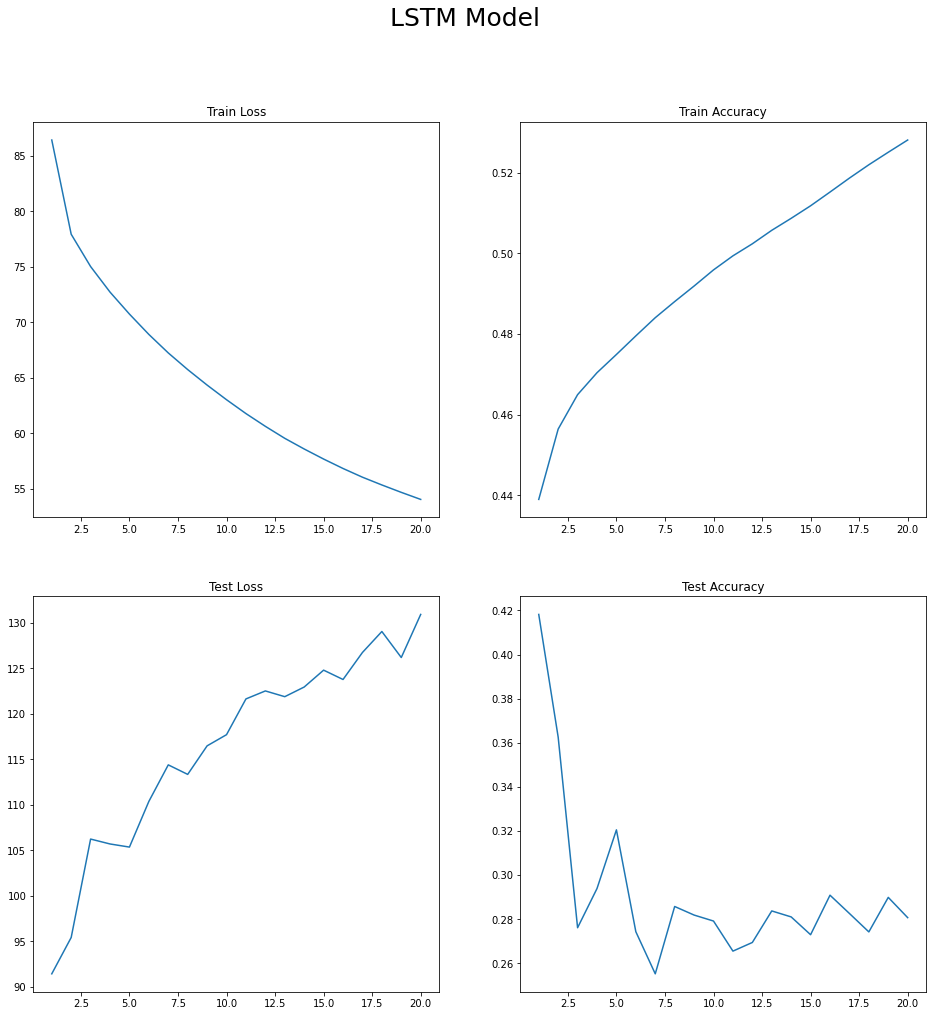

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
figure = plt.figure(figsize=(16, 16))

xpoints = np.arange(1,epochs+1)
figure.add_subplot(2, 2, 1)
plt.plot(xpoints, train_loss)
plt.title("Train Loss")

figure.add_subplot(2, 2, 2)
plt.plot(xpoints, train_accuracy)
plt.title("Train Accuracy")

figure.add_subplot(2, 2, 3)
plt.plot(xpoints, test_loss)
plt.title("Test Loss")

figure.add_subplot(2, 2, 4)
plt.plot(xpoints, test_accuracy)
plt.title("Test Accuracy")
plt.suptitle("LSTM Model", fontsize=25)

plt.show()

##Download The Best LSTM Model##
**If you ran two above sections, there is no need to run the next cell.**

In [ ]:
!gdown 1ysIRKfaMmkeMCz3P-1E3-uhdJhqopubh
!gdown 1ltHoWcPDy5q8a03YIrWZimQxPSKO65AU

Downloading...
From: https://drive.google.com/uc?id=1ysIRKfaMmkeMCz3P-1E3-uhdJhqopubh
To: /content/LSTM_Encoder.pth
100% 1.23M/1.23M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ltHoWcPDy5q8a03YIrWZimQxPSKO65AU
To: /content/LSTM_Decoder.pth
100% 10.8M/10.8M [00:00<00:00, 120MB/s]


##Generate Random 100 Next Verses##
The Generative model gets the 100 random input verses and gives the next probable verses.

In [ ]:
decoder = torch.load('LSTM_Decoder.pth')
encoder= torch.load('LSTM_Encoder.pth')

In [ ]:
for i in range(100):
    verse_num = torch.randint(len(df)-2, (1,)).item()
    print('The Input Verse Is: '+df[verse_num])
    print('The Predicted Next Verse Is: '+Generative_Model(df[verse_num], encoder,decoder))
    print('The Real Next Verse Is: '+df[verse_num+1])
    print('-----------')

The Input Verse Is: بنه نامه و نام یزدان بخوان بگردان عنان تیز و لختی ممان
The Predicted Next Verse Is: چنین و خون داد گیو و که و ز چون پر گودرز از و و آب رهام دلش
The Real Next Verse Is: بشد گیو نیزه گرفته به دست پر از آفرین جان یزدان پرست
-----------
The Input Verse Is: سپهدار خود دیده بد روزگار نرفتی بگفتار آموزگار
The Predicted Next Verse Is: چنین که کلاه گفت شد چین اندر آن و آمد ز ز به گفتار روی نزدیک کرد شاه آمد
The Real Next Verse Is: بیاراست قلب و جناح سپاه طلایه که دارد ز دشمن نگاه
-----------
The Input Verse Is: بینداخت تیغ پرند آورش همی خواست از تن بریدن سرش
The Predicted Next Verse Is: چنین جهان گفت از آن و تو زمان ز ز شاه پای جای را تنگ شهریار و
The Real Next Verse Is: سر تیغ بر گردن رخش خورد ببرید بر گستوان نبرد
-----------
The Input Verse Is: مرا پاسخ این بد که این بایدم چو دیگر گزینم گزند آیدم
The Predicted Next Verse Is: بدو هر روی گفت که این از و سخن بر بوم گوی شاه و را را به خرد
The Real Next Verse Is: فرستاد و کنداوران را بخواند برتخت شاهی به زانو نشاند
-----------


#Part2: GRU#

##Creating GRU Encoder##

In [ ]:
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
torch.manual_seed(42)



class gru_encoder(nn.Module):

    def __init__(self, input_size, hidden_size, length_dict = len(verses_dict), num_layers = 1):

        super(gru_encoder, self).__init__()

        self.embedding = nn.Embedding(length_dict, input_size, padding_idx=0)
        self.gru = nn.GRU(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers,batch_first = True)

    def forward(self, x_input):

        x_input = self.embedding(x_input) 
        gru_out, hidden = self.gru(x_input)
        
        return gru_out, hidden     



In [ ]:
torch.manual_seed(42)
input_size = word_embeded_dim
hidden_size = word_embeded_dim**2
length_dict = len(verses_dict)
encoder = gru_encoder(input_size = input_size, hidden_size = hidden_size, length_dict = length_dict).to(device)

In [ ]:
torch.manual_seed(42)
#giving encoder instance example of mini batch =2
encoder_output,decoder_init_hidden=encoder(verses_words_index_torch[0:2].to(device))
#showing last hidden unit (h_n) of encoder is equal to the last rows of output(for first element in minibatch_size =2)
decoder_init_hidden[0][0]
encoder_output[0][-1]

tensor([-0.0204,  0.0172,  0.1003,  0.1064,  0.0633, -0.0062, -0.0560, -0.0325,
         0.0080, -0.0583, -0.1159,  0.0392,  0.0248,  0.0164,  0.0473, -0.0287,
         0.0296, -0.0601,  0.0100,  0.0533,  0.0413, -0.0898, -0.0802, -0.0539,
         0.1261, -0.0399, -0.0553, -0.1157,  0.0561,  0.0348,  0.0046, -0.0463,
         0.0368,  0.0012, -0.0242, -0.0409,  0.0016, -0.0964,  0.0179, -0.0120,
        -0.0731,  0.0168,  0.0124, -0.0024, -0.0844, -0.0071, -0.0255,  0.0502,
        -0.0226,  0.0174,  0.0772,  0.0091,  0.0304, -0.0994, -0.0006,  0.0146,
         0.0229,  0.0011,  0.0680,  0.0781, -0.0999, -0.0875, -0.0011, -0.0580,
         0.0969, -0.0170, -0.0102,  0.0317,  0.0215, -0.0030,  0.0420, -0.0016,
        -0.0354, -0.0611, -0.0990,  0.0265, -0.0104,  0.0313, -0.0756,  0.0250,
        -0.0523,  0.0705,  0.0803, -0.0356,  0.0185, -0.0257, -0.0380,  0.0539,
         0.0377,  0.0532, -0.0523,  0.0532, -0.0849, -0.0899, -0.0228,  0.0132,
         0.0052,  0.0496,  0.0193,  0.04

##Creating GRU Decoder##

In [ ]:
class gru_decoder(nn.Module):
    
    def __init__(self, input_size, output_size, hidden_size,  num_layers = 1):

        super(gru_decoder, self).__init__()

        self.gru = nn.GRU(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers,batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)           

    def forward(self, x_input, hidden_states):
                         
        x_input = encoder.embedding(x_input)
        gru_out, hidden = self.gru(x_input,  hidden_states)
        output = self.linear(gru_out)     
        output = output.squeeze(dim=1)
        return output, hidden


In [ ]:
#giving decoder instance input example: 'Null' and hidden example: Last hidden units of encoder for mini batch =2
output_size = len(verses_dict)
decoder = gru_decoder(input_size = input_size, output_size = output_size, hidden_size = hidden_size).to(device)
output,_= decoder(torch.tensor(len(verses_dict)-1)*torch.ones(2,1).type(torch.LongTensor).to(device),decoder_init_hidden)
output

tensor([[ 0.0207, -0.1145,  0.0591,  ...,  0.0598, -0.0262,  0.0961],
        [ 0.0206, -0.1147,  0.0592,  ...,  0.0598, -0.0262,  0.0961]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

##GRU Training##
**If you don't have time, you can skip two next sections and download the best model.**

In [ ]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
epochs = 20
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=learning_rate)
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []
torch.manual_seed(42)
verse_num = torch.randint(len(df)-2, (1,)).item()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_accuracy_loss=train_loop(train_dataloader,encoder, decoder, loss_fn, encoder_optimizer,decoder_optimizer)
    train_accuracy.append(train_accuracy_loss[0])
    train_loss.append(train_accuracy_loss[1])
    test_accuracy_loss=test_loop(test_dataloader,encoder, decoder, loss_fn,"gru")
    test_accuracy.append(test_accuracy_loss[0])
    test_loss.append(test_accuracy_loss[1])
    print('The Input Verse Is: '+df[verse_num])
    print('The Predicted Next Verse Is: '+Generative_Model(df[verse_num],encoder,decoder,"gru"))
    print('The Real Next Verse Is: '+df[verse_num+1])   
    torch.save(encoder,'GRU_Encoder.pth')
    torch.save(decoder,'GRU_Decoder.pth')

print("Done!")

Epoch 1
-------------------------------
loss: 196.277557  [    0/39686]
loss: 83.718681  [ 6400/39686]
loss: 82.467468  [12800/39686]
loss: 80.899559  [19200/39686]
loss: 80.038383  [25600/39686]
loss: 78.893867  [32000/39686]
loss: 78.406532  [38400/39686]
Test Error: 
 Accuracy: 41.8%, Avg loss: 89.483075 

The Input Verse Is: سپاسی برین کار بر من نهی کز اندیشه گردد دل من تهی
The Predicted Next Verse Is: چو آمد آمد را به من و را راه بر به و
The Real Next Verse Is: بدو گفت رستم که چندین سخن که گفتی و افگندی از مهر بن
Epoch 2
-------------------------------
loss: 78.645706  [    0/39686]
loss: 77.276772  [ 6400/39686]
loss: 75.924110  [12800/39686]
loss: 76.971344  [19200/39686]
loss: 77.759537  [25600/39686]
loss: 76.919182  [32000/39686]
loss: 75.862999  [38400/39686]
Test Error: 
 Accuracy: 33.0%, Avg loss: 100.614266 

The Input Verse Is: سپاسی برین کار بر من نهی کز اندیشه گردد دل من تهی
The Predicted Next Verse Is: چنین که داد گفتی و را آمد ز ز به گفتار راه نزدیک تو شاه
The Real N

##Plot Accuracy & Loss of Training & Test Data of GRU Model ##


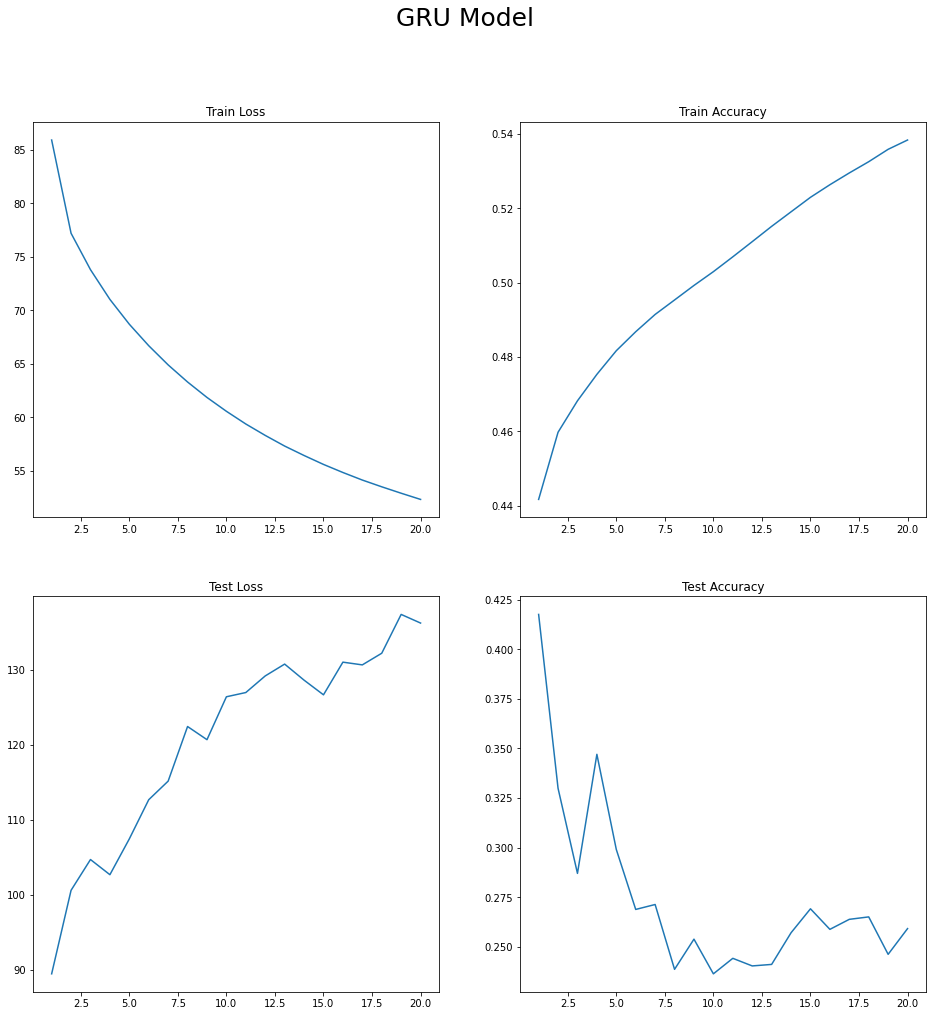

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
figure = plt.figure(figsize=(16, 16))

xpoints = np.arange(1,epochs+1)
figure.add_subplot(2, 2, 1)
plt.plot(xpoints, train_loss)
plt.title("Train Loss")

figure.add_subplot(2, 2, 2)
plt.plot(xpoints, train_accuracy)
plt.title("Train Accuracy")

figure.add_subplot(2, 2, 3)
plt.plot(xpoints, test_loss)
plt.title("Test Loss")

figure.add_subplot(2, 2, 4)
plt.plot(xpoints, test_accuracy)
plt.title("Test Accuracy")
plt.suptitle("GRU Model", fontsize=25)

plt.show()

##Download The Best GRU Model##
**If you ran two above sections, there is no need to run the next cell.**

In [ ]:
!gdown --id 1URrh0nYFAbpBlNzu56igWRuxxyz9EVfx
!gdown --id 1p4gISgWkLiyIxJPnAFEhwOso9UX_bx94

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1URrh0nYFAbpBlNzu56igWRuxxyz9EVfx
To: /content/GRU_Encoder.pth
100% 1.14M/1.14M [00:00<00:00, 165MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p4gISgWkLiyIxJPnAFEhwOso9UX_bx94
To: /content/GRU_Decoder.pth
100% 10.7M/10.7M [00:00<00:00, 85.4MB/s]


##Generate Random 100 Next Verses##
The Generative model gets the 100 random input verses and gives the next probable verses.

In [ ]:
decoder = torch.load('GRU_Decoder.pth')
encoder= torch.load('GRU_Encoder.pth')

In [ ]:
for i in range(100):
    verse_num = torch.randint(len(df)-2, (1,)).item()
    print('The Input Verse Is: '+df[verse_num])
    print('The Predicted Next Verse Is: '+Generative_Model(df[verse_num], encoder,decoder,"gru"))
    print('The Real Next Verse Is: '+df[verse_num+1])
    print('-----------')

The Input Verse Is: چه بایست آن رادی و راستی چو رفتن ز گیتی چنین خواستی
The Predicted Next Verse Is: بدو و گفت مهر آمد که تو بروی از دور به مهر بادا جای و بود نیست بوم تا
The Real Next Verse Is: کنون کام دشمن برآمد همه ببد بر تو گیتی سرآمد همه
-----------
The Input Verse Is: که باشد که پیوند سام سوار نخواهد ز اهواز تا قندهار
The Predicted Next Verse Is: چو من بشنید سخن زنیم پیغام گفتن به او بپژمرد دست را و شنید را نبرد ز بخواند
The Real Next Verse Is: بدو گفت سیندخت کای سرفراز به گفتار کژی مبادم نیاز
-----------
The Input Verse Is: ز یزدان سپاس و بدویم پناه کت آورد پیشم بدین رزمگاه
The Predicted Next Verse Is: بدو خواب گفت را شاد و به و دو کردار بس دیده روی دو آمد گوش به و
The Real Next Verse Is: بلشکر بران سان فرستمت باز که گیو از تو ماند بگرم و گداز
-----------
The Input Verse Is: گشادن در گنج را گاه دید درم خوار شد چون پسر شاه دید
The Predicted Next Verse Is: چنین سپار نهفت داد کن رنج و نشان تو به باد خوبی همی و ز دود یزدان و
The Real Next Verse Is: همان جامه و گوهر شاهوار همان اسپ 